### 1. Importar todas las librerías necesarias.

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 2. Inicializar variables.

In [2]:
hostnames = []
dataset = []
df = None
grupo_alpha = []
sistemas = ['L', 'S', 'A', 'H']
entornos = ['D', 'I', 'T', 'S', 'P']
paises = ['NOR', 'FRA', 'ITA', 'ESP', 'DEU', 'IRL']

### 3. Crear una función para generar los hostnames en base a unas reglas.

In [3]:
#En esta función he utilizado el parámetro weights que descubrí investigando un poco para distribuir los porcentajes de elección "pseudoaleatoria" de los distintos elementos, en lugar de utilizar el método que aparecía en el ejemplo.
def set_hostnames(number_of_hosts: int) -> None:   
    for i in range(number_of_hosts):
        eleccion_sistemas = random.choices(sistemas, weights=(40, 30, 20, 10), k=1)
        eleccion_entornos = random.choices(entornos, weights=(10, 10, 25, 25, 30), k=1)
        eleccion_paises = random.choices(paises, weights=(6, 9, 16, 16, 23, 30), k=1)
        host_alpha = eleccion_sistemas[0] + eleccion_entornos[0] + eleccion_paises[0]
        grupo_alpha.append(host_alpha)
        hostnames.append(host_alpha + str(grupo_alpha.count(host_alpha)).zfill(3))


### 4. Crear una función para obtener el nombre del SO.

In [4]:
def get_os(hostname: str) -> str:
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else:
        return 'Unknown'

### 5. Crear una función para obtener el nombre del entorno.

In [5]:
def get_environment(hostname: str) -> str:
    if hostname[1] == 'D':
        return 'Development'
    elif hostname[1] == 'I':
        return 'Integration'
    elif hostname[1] == 'T':
        return 'Testing'
    elif hostname[1] == 'S':
        return 'Staging'
    elif hostname[1] == 'P':
        return 'Production'
    else:
        return 'Unknown'

### 6. Crear una función para obtener el nombre del país.

In [6]:
def get_country(hostname: str) -> str:
    if hostname[2:5] == 'NOR':
        return 'Norway'
    elif hostname[2:5] == 'FRA':
        return 'France'
    elif hostname[2:5] == 'ITA':
        return 'Italy'
    elif hostname[2:5] == 'ESP':
        return 'Spain'
    elif hostname[2:5] == 'DEU':
        return 'Germany'
    elif hostname[2:5] == 'IRL':
        return 'Ireland'
    else:
        return 'Unknown'

### 7. Crear una función para generar el DataFrame.

In [7]:
def set_dataframe(count: int) -> None:
    global df
    
    set_hostnames(count)
    
    for hostname in hostnames:
        dataset.append({
            'hostname': hostname,
            'os': get_os(hostname),
            'environment': get_environment(hostname),
            'country': get_country(hostname),
            'node': int(hostname[-3:])
        })
    df = pd.DataFrame(dataset)

### 8. Crear el DataFrame

In [8]:
set_dataframe(1500)

In [9]:
df

,hostname,os,environment,country,node
0,LTITA001,Linux,Testing,Italy,1
1,LPDEU001,Linux,Production,Germany,1
2,LPESP001,Linux,Production,Spain,1
3,LPESP002,Linux,Production,Spain,2
4,LIITA001,Linux,Integration,Italy,1
...,...,...,...,...,...
1495,APESP018,AIX,Production,Spain,18
1496,ASESP011,AIX,Staging,Spain,11
1497,LSIRL057,Linux,Staging,Ireland,57
1498,LSFRA011,Linux,Staging,France,11


In [10]:
df.head(50)

,hostname,os,environment,country,node
0,LTITA001,Linux,Testing,Italy,1
1,LPDEU001,Linux,Production,Germany,1
2,LPESP001,Linux,Production,Spain,1
3,LPESP002,Linux,Production,Spain,2
4,LIITA001,Linux,Integration,Italy,1
5,SSIRL001,Solaris,Staging,Ireland,1
6,LSITA001,Linux,Staging,Italy,1
7,LDESP001,Linux,Development,Spain,1
8,ASESP001,AIX,Staging,Spain,1
9,SSESP001,Solaris,Staging,Spain,1


### 9. Guardar el DataFrame generado en un fichero CSV.

In [11]:
df.to_csv(
'hosts.csv',
header=True,
index=False
)

In [12]:
hosts_df = pd.read_csv(
    'hosts.csv',
    encoding='ISO-8859-1'
)

hosts_df

,hostname,os,environment,country,node
0,LTITA001,Linux,Testing,Italy,1
1,LPDEU001,Linux,Production,Germany,1
2,LPESP001,Linux,Production,Spain,1
3,LPESP002,Linux,Production,Spain,2
4,LIITA001,Linux,Integration,Italy,1
...,...,...,...,...,...
1495,APESP018,AIX,Production,Spain,18
1496,ASESP011,AIX,Staging,Spain,11
1497,LSIRL057,Linux,Staging,Ireland,57
1498,LSFRA011,Linux,Staging,France,11


### 10. Generar un único gráfico agrupando para cada país los entornos.

In [13]:
h = hosts_df
entornos_por_pais = h.groupby(['country', 'environment']).size()
entornos_por_pais

country  environment
France   Development      4
         Integration     15
         Production      35
         Staging         39
         Testing         43
Germany  Development     39
         Integration     30
         Production     105
         Staging         89
         Testing         86
Ireland  Development     38
         Integration     41
         Production     133
         Staging        119
         Testing        103
Italy    Development     17
         Integration     30
         Production      78
         Staging         62
         Testing         65
Norway   Development      6
         Integration     12
         Production      27
         Staging         21
         Testing         22
Spain    Development     25
         Integration     19
         Production      74
         Staging         64
         Testing         59
dtype: int64

In [14]:
entornos_por_pais.unstack()

environment,Development,Integration,Production,Staging,Testing
country,,,,,
France,4,15,35,39,43
Germany,39,30,105,89,86
Ireland,38,41,133,119,103
Italy,17,30,78,62,65
Norway,6,12,27,21,22
Spain,25,19,74,64,59


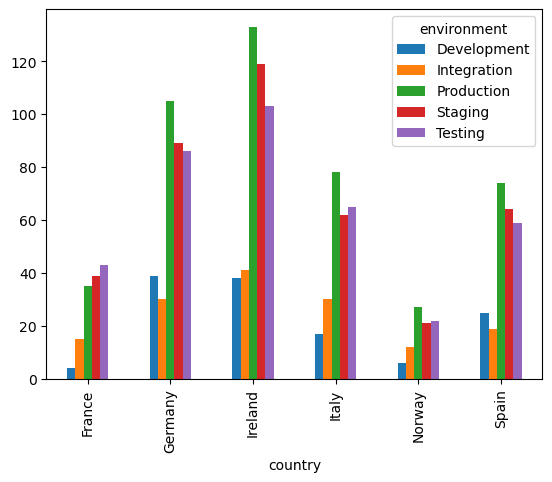

In [15]:
entornos_por_pais.unstack().plot(kind='bar');

### 11. Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas.

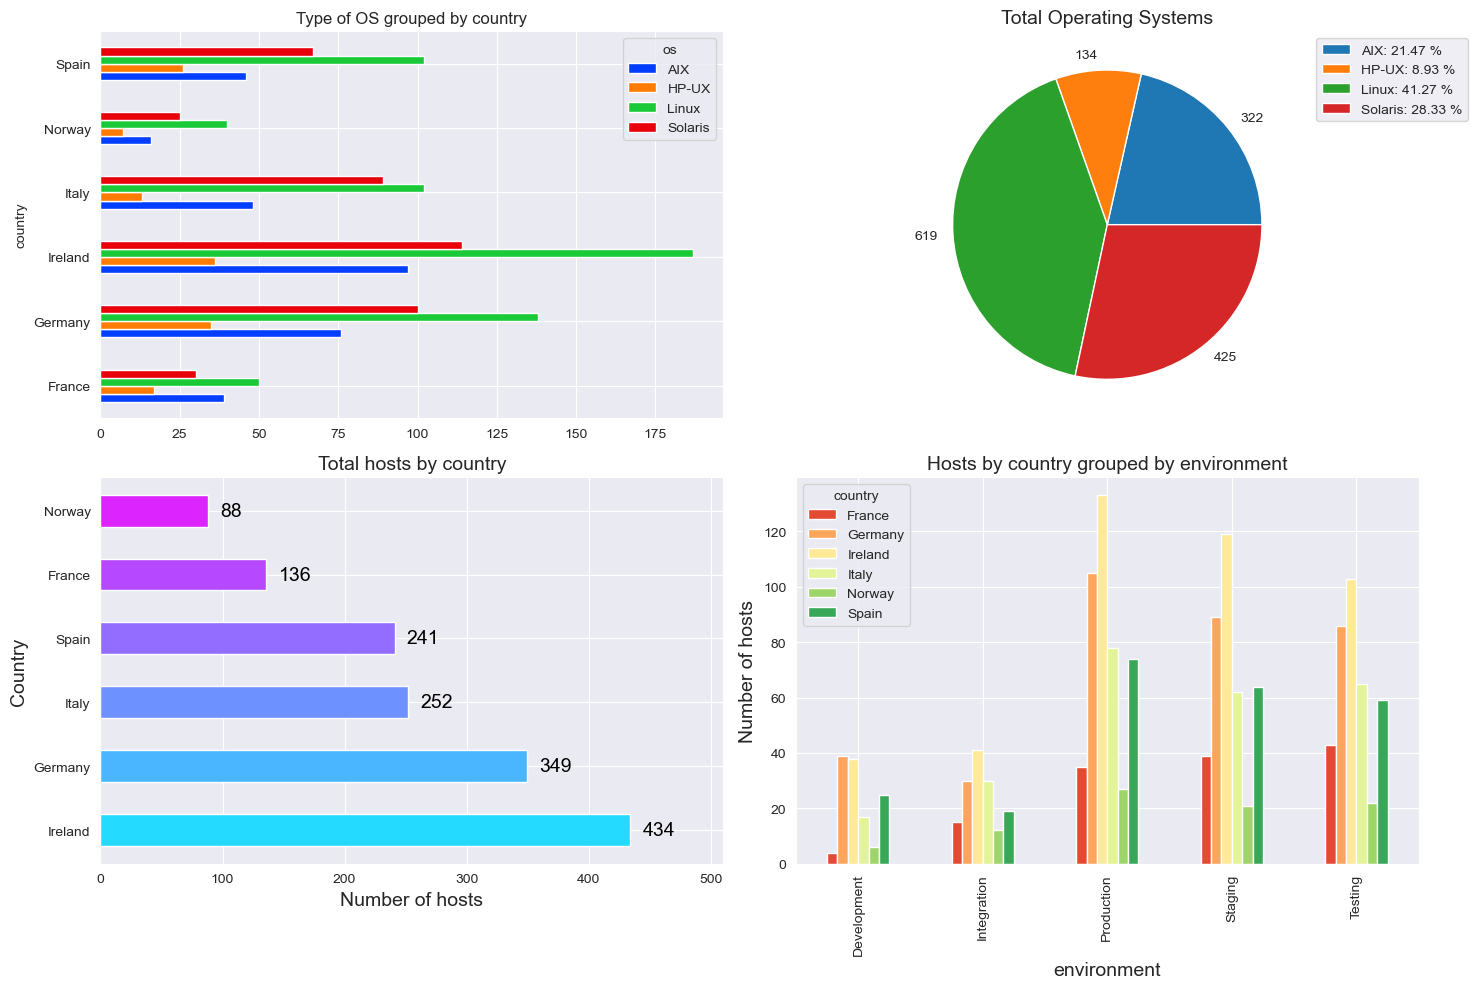

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.set_style("darkgrid") #he añadido este estilo de seaborn a todos los gráficos porque me parecía que se veía más limpio así.

#gráfico superior izquierda:
types = h.groupby(['country', 'os']).size()
grafico_1=types.unstack()
grafico_1.plot.barh(ax=axs[0,0], color=sns.color_palette(palette='bright'))
axs[0, 0].set_title('Type of OS grouped by country', loc='center');

#gráfico superior derecha:
total_os = h.groupby(['os']).size()
mylabels = total_os.to_numpy()
total_os.plot.pie(y='os', startangle=0, labels = mylabels, ax=axs[0,1])
axs[0, 1].set_ylabel('')
percents = total_os.to_numpy() * 100 / total_os.to_numpy().sum()
axs[0, 1].legend(bbox_to_anchor=(1.45,1), loc='upper right',
                 labels=['%s: %1.2f %%' % (l, s) for l, s in zip(total_os.index, percents)])
axs[0, 1].set_title('Total Operating Systems', fontsize=14);

#gráfico inferior izquierda:
y = h['country'].value_counts(ascending=False)
axs[1, 0].barh(y.index, y, height=0.5, color=sns.color_palette(palette='cool'))
axs[1, 0].set_title('Total hosts by country', fontsize=14)
axs[1, 0].set_xlabel('Number of hosts', fontsize=14)
axs[1, 0].set_ylabel('Country', fontsize=14)
axs[1, 0].set_xlim(0, 510)
for i, v in enumerate(y):
    axs[1, 0].text(v + 10, i, str(v), color='black', fontsize=14, ha='left', va='center')

#gráfico inferior derecha:
grafico_4 = h.groupby(['environment', 'country']).size()
grafico_4.unstack().plot.bar(ax=axs[1,1], color=sns.color_palette(palette='RdYlGn'))
axs[1, 1].set_ylabel('Number of hosts', fontsize=14)
axs[1, 1].set_xlabel('environment', fontsize=14)
axs[1, 1].set_title('Hosts by country grouped by environment', fontsize=14);
    
fig.tight_layout()